In [26]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
import numpy as np
 
start_value1= 1e-04
end_value1 = 8e-04

 
# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)

csv_file = 'combinations.csv'
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))
 
print(array)


[0.0001     0.00012414 0.00014828 0.00017241 0.00019655 0.00022069
 0.00024483 0.00026897 0.0002931  0.00031724 0.00034138 0.00036552
 0.00038966 0.00041379 0.00043793 0.00046207 0.00048621 0.00051034
 0.00053448 0.00055862 0.00058276 0.0006069  0.00063103 0.00065517
 0.00067931 0.00070345 0.00072759 0.00075172 0.00077586 0.0008    ]


In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns=t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.1,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.2,5.720554,5.720554,5.720554,5.720544,5.720499,5.720373,5.720113,5.719662,5.718973,5.718010,...,5.689029,5.685170,5.681204,5.677149,5.673024,5.668848,5.664635,5.660400,5.656155,5.651913
0.3,5.720554,5.720555,5.720545,5.720458,5.720137,5.719374,5.717959,5.715723,5.712557,5.708410,...,5.613873,5.602979,5.592017,5.581037,5.570083,5.559197,5.548410,5.537753,5.527251,5.516924
0.4,5.720554,5.720555,5.720497,5.720110,5.718929,5.716444,5.712248,5.706098,5.697916,5.687751,...,5.499650,5.480342,5.461218,5.442351,5.423802,5.405620,5.387846,5.370510,5.353639,5.337248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,3.192908,2.391041,1.755811,1.288024,0.958810,0.731169,0.573085,0.461347,0.380518,0.320692,...,0.120879,0.116829,0.113551,0.110909,0.108792,0.107170,0.105926,0.104927,0.104127,0.103490
49.7,3.189833,2.387811,1.752834,1.285511,0.956794,0.729585,0.571839,0.460354,0.379717,0.320035,...,0.120766,0.116733,0.113470,0.110842,0.108736,0.107127,0.105891,0.104898,0.104102,0.103470
49.8,3.186762,2.384587,1.749864,1.283006,0.954785,0.728006,0.570597,0.459366,0.378919,0.319380,...,0.120653,0.116637,0.113390,0.110774,0.108680,0.107085,0.105855,0.104868,0.104078,0.103450
49.9,3.183694,2.381369,1.746901,1.280508,0.952783,0.726433,0.569360,0.458383,0.378125,0.318729,...,0.120542,0.116543,0.113310,0.110708,0.108625,0.107043,0.105820,0.104839,0.104053,0.103430


(0.0, 6.0)

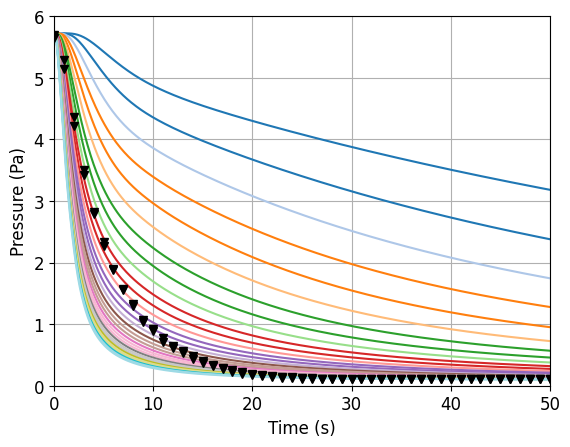

In [28]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT1_800_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 6)

minimum RMSE position:  12
minimum particle_diameter:  particle_diameter_1    0.00039
Name: 12, dtype: float64


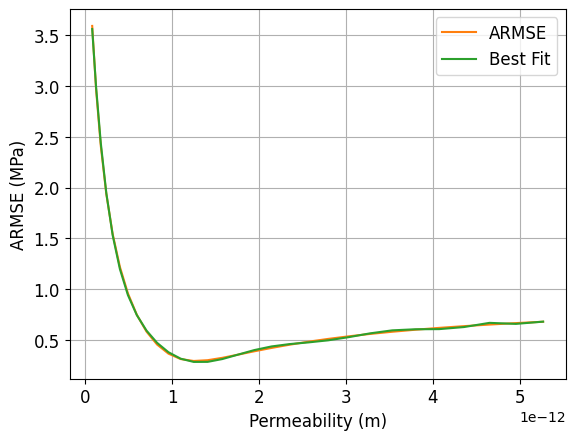

In [29]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_800_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)


parameters = pd.read_csv('combinations.csv')**2/150*0.001/(1-0.1)**2
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability (m)', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

minimum RMSE position:  12
minimum particle_diameter:  particle_diameter_1    0.00039
Name: 12, dtype: float64


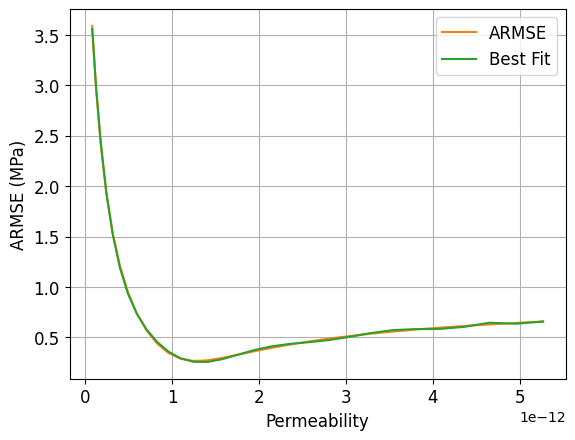

In [30]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_800_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)

parameters = pd.read_csv('combinations.csv')**2/150*0.001/(1-0.1)**2
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

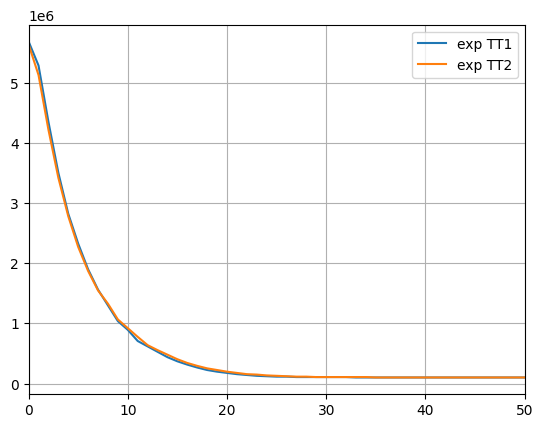

In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


# TT1_1 = pd.read_csv('model_pellets_1.csv')
# TT1_2 = pd.read_csv('model_pellets_2.csv')
# plt.plot(TT1_1['time'], TT1_1['inlet-p'], label = 'CFD TT1')
# plt.plot(TT1_2['time'], TT1_2['inlet-p'], label = 'CFD TT2')
plt.plot(data20['time'], data20['CT1_800_1'], label = 'exp TT1')
plt.plot(data20['time'], data20['CT1_800_2'], label = 'exp TT2')
plt.grid()
plt.xlim(0, 50)
plt.legend()